## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('bmh')

# for Interactive Shells
from IPython.display import display

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Train | Test Split

In [4]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Random Forest Classification

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Using 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
model.fit(X_train,y_train)

preds = model.predict(X_test)

## Evaluation

In [9]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [10]:
confusion_matrix(y_test,preds)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

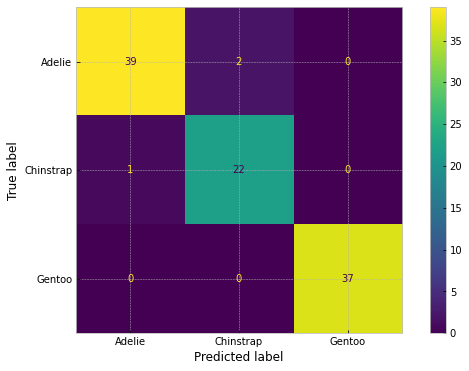

In [11]:
plot_confusion_matrix(model,X_test,y_test)

## Feature Importance

Very useful attribute of the trained model!

In [12]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

### Choosing correct number of trees

In [13]:
test_error = []

for n in range(1,40):
    # Using n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

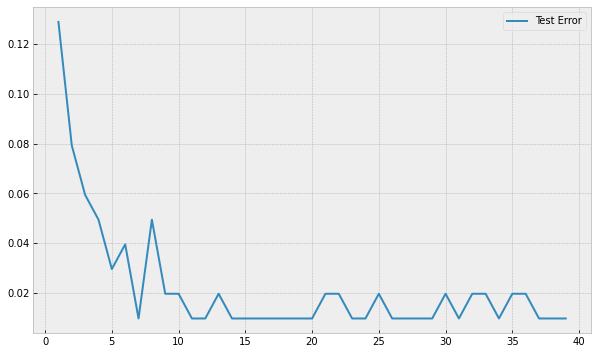

In [14]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

In [16]:
X_test

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
202,48.1,16.4,199.0,3325.0,1,0,1,0
315,50.8,15.7,226.0,5200.0,0,0,0,1
141,40.6,17.2,187.0,3475.0,1,0,0,1
200,51.5,18.7,187.0,3250.0,1,0,0,1
299,45.2,16.4,223.0,5950.0,0,0,0,1
...,...,...,...,...,...,...,...,...
263,49.6,15.0,216.0,4750.0,0,0,0,1
89,38.9,18.8,190.0,3600.0,1,0,1,0
210,50.2,18.8,202.0,3800.0,1,0,0,1
23,38.2,18.1,185.0,3950.0,0,0,0,1


In [17]:
# let's see what our model will predict for index 202

new_data = [[48.1,16.4,199.0,3325.0,1,0,1,0]]

model.predict(new_data)

array(['Chinstrap'], dtype=object)

In [18]:
#from above we can see that our model predicted 'Chinstrap' as penguin species...let's see what was the orignal species

df.iloc[202]

species              Chinstrap
island                   Dream
culmen_length_mm          45.2
culmen_depth_mm           16.6
flipper_length_mm        191.0
body_mass_g             3250.0
sex                     FEMALE
Name: 208, dtype: object

**orignal species match with out predicted model species**